In [1]:
import tensorflow as tf 
import keras
from keras.utils import plot_model
import cv2 as cv
import matplotlib.pyplot as plt



%matplotlib inline

Using TensorFlow backend.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
print(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1



In [4]:
img = cv.imread("./21.jpg")
img2 = cv.imread("./0272.jpg")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

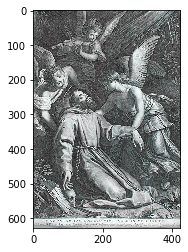

In [5]:
plt.imshow(img)

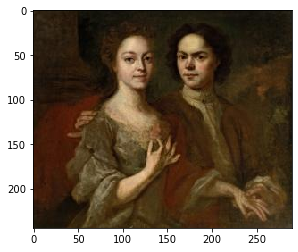

In [6]:
plt.imshow(img2)

In [7]:
x = []
y = []

In [32]:
"""
drawings - 0
engraving - 1 
iconography - 2 
painting - 3 
sculpture - 4 
"""

'\ndrawings - 0\nengraving - 1 \niconography - 2 \npainting - 3 \nsculpture - 4 \n'

In [3]:
import os
import pickle
import numpy as np

In [77]:
path = "../images/dataset/dataset_updated/training_set"
contador = 0
contador2 = 0

In [39]:
for filename in os.listdir(path):
    #x.append(cv.imread(path + "/" + filename))
    #y.append()
    for filenameinterno in os.listdir(path + "/" + filename):
        x.append(cv.imread(path + "/" + filename + "/" + filenameinterno))
        y.append(contador)
    contador += 1

In [79]:
deb = 0
for filename in os.listdir(path):
    for filenameinterno in os.listdir(path + "/" + filename):
        deb += 1
        if deb == 1210:
            print(filenameinterno)
    contador += 1

249.jpg


In [48]:
x_guardar = np.asarray(x)
y_guardar = np.asarray(y)

In [53]:
pickle.dump(x_guardar,open(r"D:\CS7\Machine Learning Models\artx.txt", "wb"))
pickle.dump(y_guardar,open(r"D:\CS7\Machine Learning Models\arty.txt", "wb"))

In [118]:
pruebax = pickle.load(open(r"D:\CS7\Machine Learning Models\artx.txt", "rb"))
pruebay = pickle.load(open(r"D:\CS7\Machine Learning Models\arty.txt", "rb"))

In [57]:
min1 = 20000
min2 = 20000
el = []

for i in range(len(pruebax)):
    if pruebax[i] is None:
        el.append(i)
        continue
    else:
        pruebax[i] = cv.resize(pruebax[i],(32,32))
        #pruebax[i] = cv.cvtColor(pruebax[i],cv.COLOR_BGR2RGB)    

In [58]:
pruebax = np.delete(pruebax,el)

In [59]:
pruebay = np.delete(pruebay,el)

In [60]:
pruebax = np.array(list(pruebax))

In [61]:
pruebax.shape

(8577, 32, 32, 3)

In [62]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
first = Sequential()

first.add(Conv2D(64, (3,3), activation='relu', input_shape=(pruebax.shape[1:])))
first.add(MaxPooling2D(pool_size=(2,2)))
first.add(Dropout(0.25))

first.add(Conv2D(64, (3,3), activation='relu'))
first.add(MaxPooling2D(pool_size=(2,2)))

first.add(Flatten())
first.add(Dense(128,activation='relu'))
first.add(Dense(5,activation='softmax'))

first.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(first.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)             

In [64]:
entrenar = first.fit(pruebax,pruebay,
                    batch_size=32,
                    epochs=5,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 6861 samples, validate on 1716 samples
Epoch 1/5
6861/6861 [==============================] - 2s 239us/step - loss: nan - accuracy: 0.1616 - val_loss: nan - val_accuracy: 0.0711
Epoch 2/5
6861/6861 [==============================] - 1s 212us/step - loss: nan - accuracy: 0.1613 - val_loss: nan - val_accuracy: 0.0711
Epoch 3/5
6861/6861 [==============================] - 1s 216us/step - loss: nan - accuracy: 0.1613 - val_loss: nan - val_accuracy: 0.0711
Epoch 4/5
6861/6861 [==============================] - 1s 205us/step - loss: nan - accuracy: 0.1613 - val_loss: nan - val_accuracy: 0.0711
Epoch 5/5
6861/6861 [==============================] - 1s 211us/step - loss: nan - accuracy: 0.1613 - val_loss: nan - val_accuracy: 0.0711


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pruebax,pruebay,test_size=0.2,random_state=2)

In [81]:
second = Sequential()

second.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
second.add(MaxPooling2D(pool_size=(2,2)))
second.add(Dropout(0.25))

second.add(Conv2D(64, (3,3), activation='relu'))
second.add(MaxPooling2D(pool_size=(2,2)))
second.add(Dropout(0.25))

second.add(Conv2D(128, (3,3), activation='relu'))
second.add(MaxPooling2D(pool_size=(2,2)))
second.add(Dropout(0.25))


second.add(Flatten())
second.add(Dense(256,activation='relu'))
second.add(Dense(512,activation='relu'))
second.add(Dense(512,activation='relu'))
second.add(Dense(256,activation='relu'))
second.add(Dense(5,activation='softmax'))

second.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(second.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 4, 4, 128)       

In [83]:
entrenar2 = second.fit(x_train,y_train,
                    batch_size=32,
                    epochs=25,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 5488 samples, validate on 1373 samples
Epoch 1/25
5488/5488 [==============================] - 2s 275us/step - loss: 0.9733 - accuracy: 0.6221 - val_loss: 1.0511 - val_accuracy: 0.5645
Epoch 2/25
5488/5488 [==============================] - 1s 228us/step - loss: 0.9293 - accuracy: 0.6463 - val_loss: 0.9611 - val_accuracy: 0.6336
Epoch 3/25
5488/5488 [==============================] - 1s 225us/step - loss: 0.9170 - accuracy: 0.6481 - val_loss: 1.0013 - val_accuracy: 0.5914
Epoch 4/25
5488/5488 [==============================] - 1s 226us/step - loss: 0.9054 - accuracy: 0.6514 - val_loss: 1.0234 - val_accuracy: 0.5696
Epoch 5/25
5488/5488 [==============================] - 1s 228us/step - loss: 0.8763 - accuracy: 0.6720 - val_loss: 1.0045 - val_accuracy: 0.5892
Epoch 6/25
5488/5488 [==============================] - 1s 230us/step - loss: 0.8744 - accuracy: 0.6742 - val_loss: 1.0545 - val_accuracy: 0.5878
Epoch 7/25
5488/5488 [==============================] - 1s 227us/step - loss

In [92]:
third = Sequential()

third.add(Conv2D(64, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
third.add(MaxPooling2D(pool_size=(2,2)))
third.add(Dropout(0.25))

third.add(Conv2D(64, (3,3), activation='relu'))
third.add(MaxPooling2D(pool_size=(2,2)))
third.add(Dropout(0.25))

third.add(Conv2D(128, (3,3), activation='relu'))
third.add(MaxPooling2D(pool_size=(2,2)))
third.add(Dropout(0.25))


third.add(Flatten())
third.add(Dense(256,activation='relu'))
third.add(Dense(512,activation='relu'))
third.add(Dense(512,activation='relu'))
third.add(Dense(512,activation='relu'))
third.add(Dense(512,activation='relu'))
third.add(Dense(256,activation='relu'))
third.add(Dense(5,activation='softmax'))

third.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(third.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 4, 128)       

In [93]:
entrenar3 = third.fit(x_train,y_train,
                    batch_size=32,
                    epochs=50,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 5488 samples, validate on 1373 samples
Epoch 1/50
5488/5488 [==============================] - 2s 327us/step - loss: 1.8720 - accuracy: 0.3103 - val_loss: 1.4211 - val_accuracy: 0.4545
Epoch 2/50
5488/5488 [==============================] - 1s 255us/step - loss: 1.2877 - accuracy: 0.4466 - val_loss: 1.2655 - val_accuracy: 0.5062
Epoch 3/50
5488/5488 [==============================] - 1s 260us/step - loss: 1.1594 - accuracy: 0.5328 - val_loss: 1.2400 - val_accuracy: 0.5200
Epoch 4/50
5488/5488 [==============================] - 1s 266us/step - loss: 1.0502 - accuracy: 0.5907 - val_loss: 1.0822 - val_accuracy: 0.5790
Epoch 5/50
5488/5488 [==============================] - 1s 258us/step - loss: 0.9724 - accuracy: 0.6314 - val_loss: 1.0217 - val_accuracy: 0.6096
Epoch 6/50
5488/5488 [==============================] - 1s 263us/step - loss: 0.9381 - accuracy: 0.6520 - val_loss: 0.9590 - val_accuracy: 0.6693
Epoch 7/50
5488/5488 [==============================] - 1s 259us/step - loss

In [96]:
score, acc = third.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

1716/1716 [==============================] - 0s 186us/step
Test score: 0.5786949468381477
Test accuracy: 0.7942890524864197


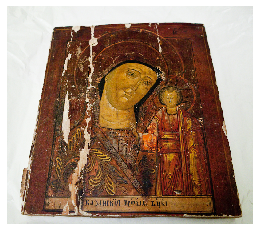

GUESS:  iconography
REAL:  iconography


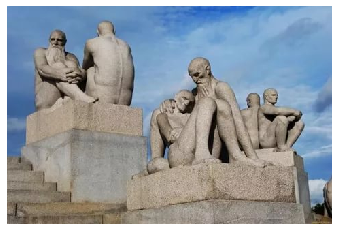

GUESS:  sculpture
REAL:  sculpture


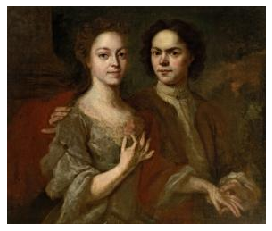

GUESS:  painting
REAL:  painting


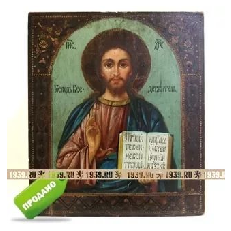

GUESS:  iconography
REAL:  iconography


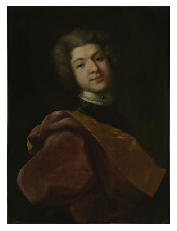

GUESS:  painting
REAL:  painting


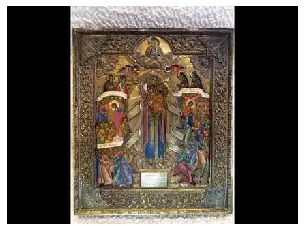

GUESS:  sculpture
REAL:  iconography


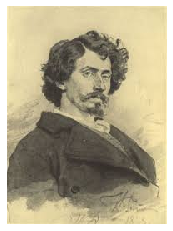

GUESS:  drawing
REAL:  drawing


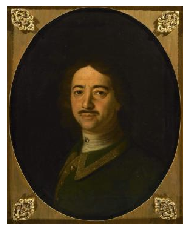

GUESS:  painting
REAL:  painting


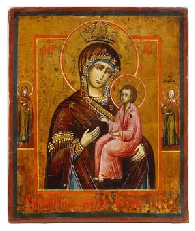

GUESS:  iconography
REAL:  iconography


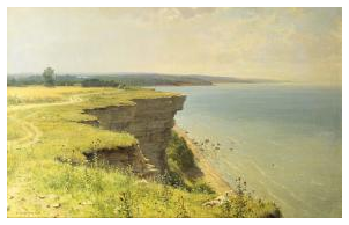

GUESS:  painting
REAL:  painting


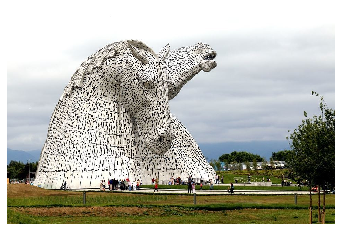

GUESS:  sculpture
REAL:  sculpture


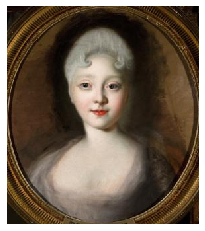

GUESS:  painting
REAL:  painting


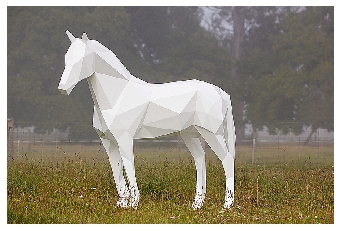

GUESS:  sculpture
REAL:  sculpture


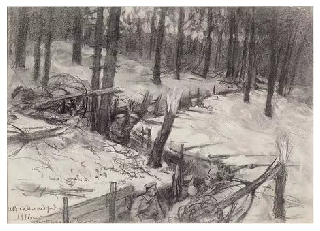

GUESS:  drawing
REAL:  drawing


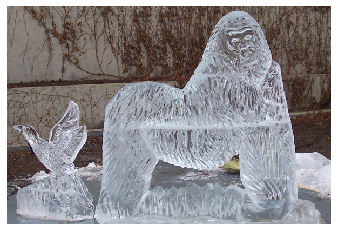

GUESS:  sculpture
REAL:  sculpture


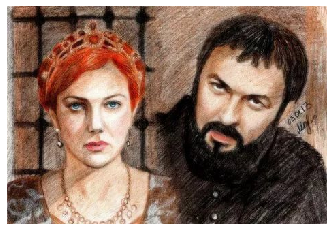

GUESS:  iconography
REAL:  drawing


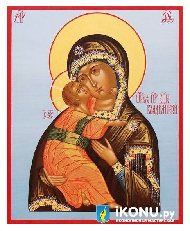

GUESS:  iconography
REAL:  iconography


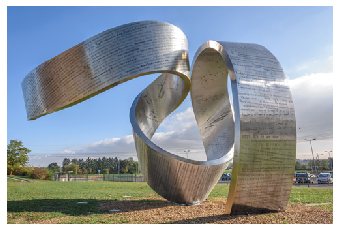

GUESS:  sculpture
REAL:  sculpture


In [ ]:
posibilidades = ['drawing','engraving','iconography','painting','sculpture']
for i in range(50):
    number = np.random.randint(1,7000)
    test_image = pruebax[number]
    transformed = cv.resize(test_image,(32,32))
    plt.imshow(cv.cvtColor(test_image,cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    print("GUESS: ",posibilidades[np.argmax(third.predict(np.expand_dims(transformed,0)))])
    print("REAL: ", posibilidades[pruebay[number]])

In [138]:
np.unique(pruebay,return_counts=True)

(array([0, 1, 2, 3, 4]), array([1229,  844, 2310, 2364, 1938], dtype=int64))